In [6]:
import numpy as np
from Functions import *

In [15]:
np.linspace(1400,1700,16)

array([1400., 1420., 1440., 1460., 1480., 1500., 1520., 1540., 1560.,
       1580., 1600., 1620., 1640., 1660., 1680., 1700.])

In [7]:
filename_ADrange = "./results/AD_range.txt"

In [12]:
data_arr = []
with open(filename_ADrange,'r') as f:
    lines = f.readlines()
    for line in lines[1:]:
        line_strip = line.strip()
        gapx = float(line_strip.split(",")[0])
        gapy = float(line_strip.split(",")[1])
        iso_zero = float(line_strip.split(",")[2])   # zero dispersion pt of isolated ring
        left_zero = float(line_strip.split(",")[3])  # left zero dispersion pt of coupled ring
        right_zero = float(line_strip.split(",")[4]) # right zero dispersion pt of coupled ring
        data_arr.append([gapx,iso_zero,left_zero,right_zero])
data_arr = (np.array(data_arr),)
data_arr


(array([[   2.6     , 1517.267206, 1502.020202, 1556.902429],
        [   2.7     , 1517.267307, 1502.020202, 1557.634854],
        [   2.8     , 1517.267409, 1530.702813, 1558.005299],
        [   2.9     , 1517.267511, 1532.19064 , 1558.219524],
        [   3.      , 1517.267613, 1533.792671, 1558.27716 ]]),)

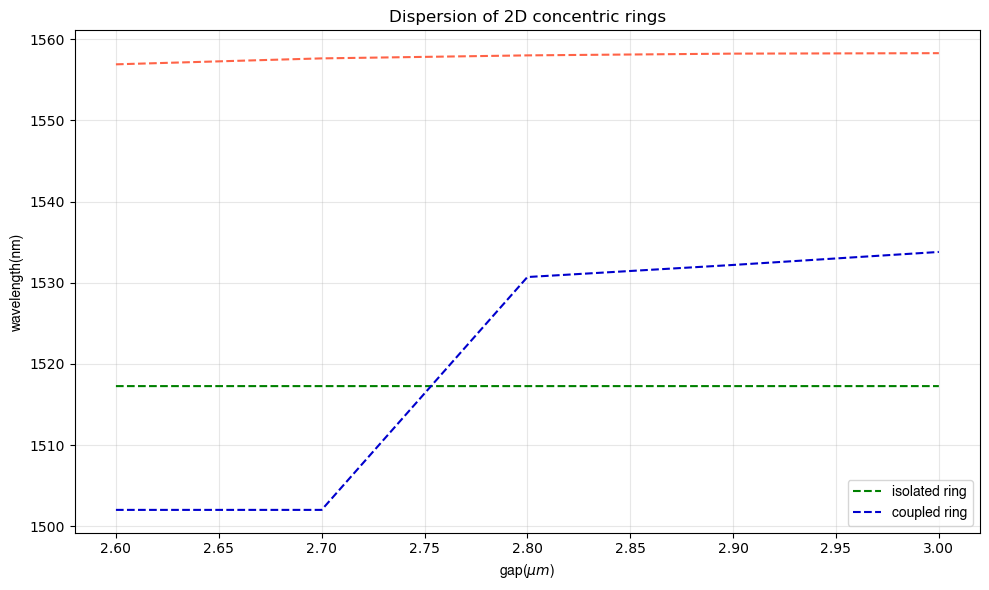

In [13]:
Plot_curve(data_arr,
        Y_legends=['isolated ring','coupled ring','']*2,
        X_label=r'gap($\mu m$)',Y_label='wavelength(nm)',
        title = "Dispersion of 2D concentric rings",
        marker_list=["","","","","",""]*2,
        linestyle_list=["--","--","--","--","-","-","-","-"],
        colors_list=['green','mediumblue','tomato','orange',
                        'tomato','orange','deepskyblue','lightskyblue']*2)